# Gender Recognition using Convolutional Neural Networks 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from tensorflow.keras import layers as L
import seaborn as sns

# Data Preparation

In [6]:
df=pd.read_csv("/content/drive/MyDrive/genderDetect/age_gender.csv")
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [8]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


# Distribution and Normalization

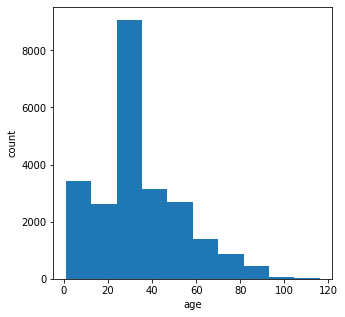

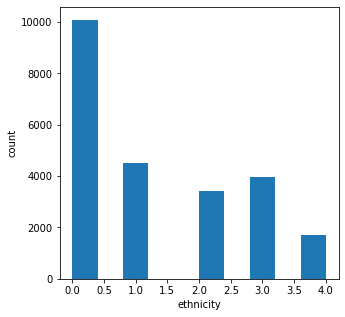

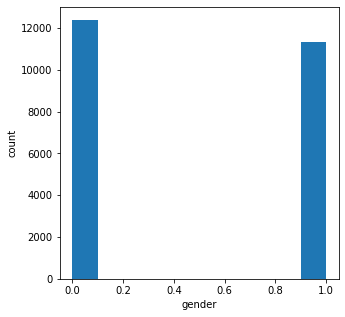

In [9]:
for i in ['age','ethnicity','gender']:
    plt.figure(figsize=(5,5))
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("count")

In [10]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [11]:
df['pixels']=df['pixels']/255

# Gender Recognition Model Building

In [12]:
X=np.array(df['pixels'].tolist())
X=X.reshape(X.shape[0],48,48,1)

In [13]:
y=df['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
input=X_train.shape[1:]
model = tf.keras.Sequential([
    L.InputLayer(input_shape=input),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

# Feeding Model & Evaluation

In [16]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=8, verbose=0,restore_best_weights=True)
history = model.fit( X_train, y_train, epochs=20, batch_size=64,validation_split=0.1, callbacks=[callback],verbose=1)

Epoch 1/20
267/267 [==============================] - 17s 15ms/step - loss: 0.5110 - accuracy: 0.7500 - val_loss: 0.5778 - val_accuracy: 0.8134
Epoch 2/20
267/267 [==============================] - 4s 13ms/step - loss: 0.3951 - accuracy: 0.8231 - val_loss: 0.3960 - val_accuracy: 0.8429
Epoch 3/20
267/267 [==============================] - 4s 14ms/step - loss: 0.3563 - accuracy: 0.8426 - val_loss: 0.3432 - val_accuracy: 0.8440
Epoch 4/20
267/267 [==============================] - 4s 14ms/step - loss: 0.3329 - accuracy: 0.8511 - val_loss: 0.3699 - val_accuracy: 0.8245
Epoch 5/20
267/267 [==============================] - 4s 14ms/step - loss: 0.3180 - accuracy: 0.8597 - val_loss: 0.2882 - val_accuracy: 0.8730
Epoch 6/20
267/267 [==============================] - 4s 14ms/step - loss: 0.3042 - accuracy: 0.8648 - val_loss: 0.2912 - val_accuracy: 0.8708
Epoch 7/20
267/267 [==============================] - 4s 14ms/step - loss: 0.2916 - accuracy: 0.8714 - val_loss: 0.2836 - val_accuracy: 0.873

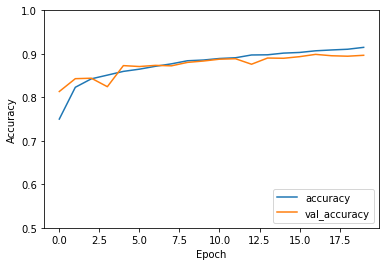

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [18]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

149/149 - 1s - loss: 0.2340 - accuracy: 0.8988 - 709ms/epoch - 5ms/step


# Sample Testing

In [19]:
predictions = model.predict(X_test)

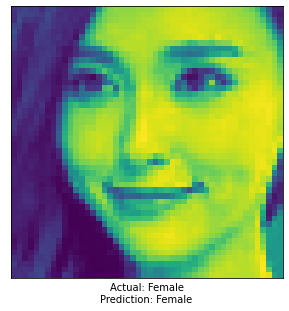

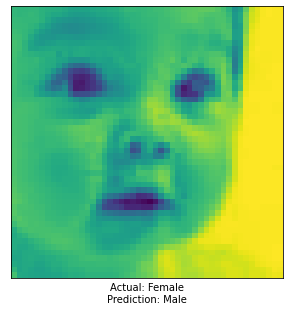

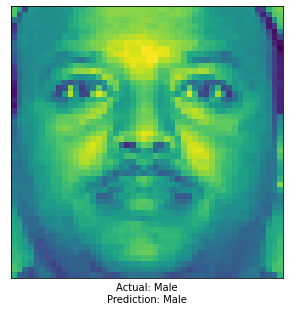

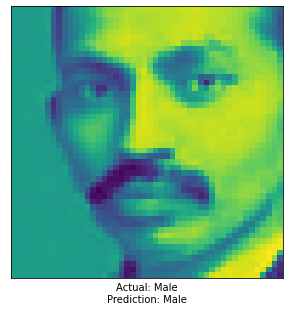

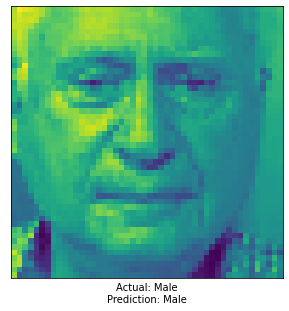

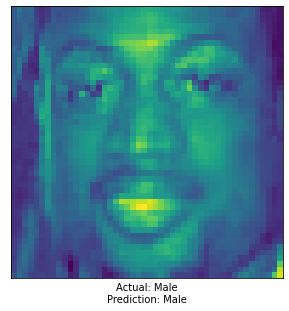

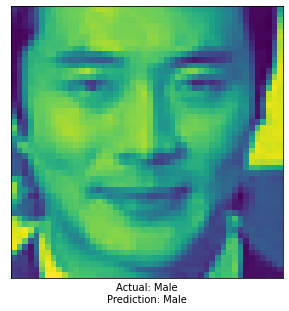

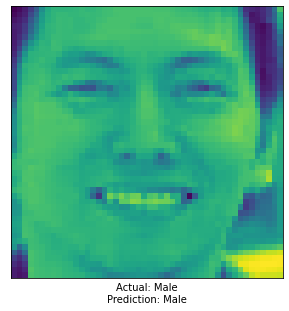

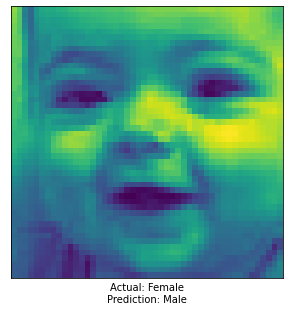

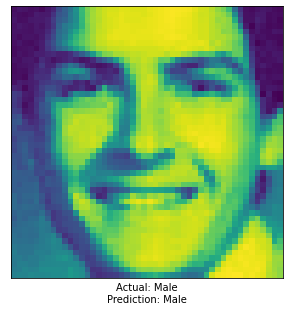

In [20]:
gen={0:'Male',1:'Female'}
for i in range(10):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(48,48))
    if predictions[i].round(0)==0:
        plt.xlabel("Actual: "+str(gen[y_test.iloc[i]])+'\n'+"Prediction: Male")
    else:
        plt.xlabel("Actual: "+str(gen[y_test.iloc[i]])+'\n'+"Prediction: Female")
plt.show()

# Metrics

In [21]:
predictions = [np.round_(p) for p in predictions]
print("Accuracy score : ", accuracy_score(predictions, y_test))

matrix = tf.math.confusion_matrix(labels=y_test, predictions=predictions).numpy()
print("\nConfusion matrix:\n", matrix)

Accuracy score :  0.8987555368065809

Confusion matrix:
 [[2268  219]
 [ 261 1993]]


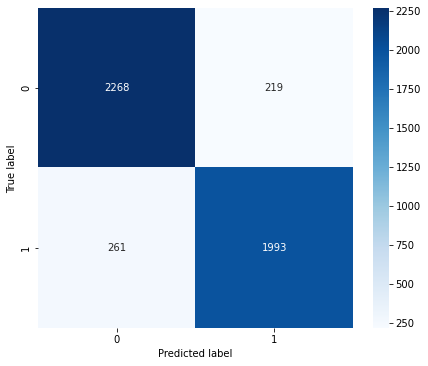

In [22]:
figure = plt.figure(figsize=(6, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
print("Classification report :\n\n", classification_report(y_test, predictions))

Classification report :

               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2487
           1       0.90      0.88      0.89      2254

    accuracy                           0.90      4741
   macro avg       0.90      0.90      0.90      4741
weighted avg       0.90      0.90      0.90      4741



# MODEL SAVING

In [24]:
model.save("/content/drive/MyDrive/genderDetect/gaa_model.h5")

##MODEL

In [26]:
import pickle
genderfile = open('/content/drive/MyDrive/genderDetect/gendermodel.pckl', 'wb')
pickle.dump(model, genderfile)
genderfile.close()

INFO:tensorflow:Assets written to: ram://ea7399a9-6473-4988-95da-dd215ad2c595/assets


# Result
 ### Training Accuracy: 91.8% 
 ### Testing Accuracy: 89.4%